In [2]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 42.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 17.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 63.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 67.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 78.7 MB/s eta 0:

Let's start by loading the dataset and conducting an exploratory data analysis (EDA). We will:

- Understand the basic structure of the data.
- Examine the distribution of the target variable, Cover_Type.
- Visualize the distribution of some of the continuous variables.
- Analyze the distribution of the Wilderness_Area and Soil_Type variables.
- Check for any missing values.
- Analyze correlations among the continuous variables.


In [3]:
import pandas as pd

# Load the dataset
link_to_data = "https://raw.githubusercontent.com/ScientificArchisman/iNeuron-internship-ForestCover_Prediction/main/artifacts/data/train_forest.csv"
forest_data = pd.read_csv(link_to_data)

# Display the first few rows of the dataset
forest_data.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


The dataset has 56 columns, which include various features related to the forest terrain, as well as the target variable Cover_Type.

Let's proceed with the EDA:

1. ### Basic Structure of the Data
We'll begin by checking the number of observations, the data types of the columns, and basic statistics for continuous variables.

In [4]:
# Displaying basic information about the dataset
data_info = forest_data.info()

# Displaying basic statistics for continuous variables
data_description = forest_data.describe()

data_info, data_description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

(None,
                 Id     Elevation        Aspect         Slope  \
 count  15120.00000  15120.000000  15120.000000  15120.000000   
 mean    7560.50000   2749.322553    156.676653     16.501587   
 std     4364.91237    417.678187    110.085801      8.453927   
 min        1.00000   1863.000000      0.000000      0.000000   
 25%     3780.75000   2376.000000     65.000000     10.000000   
 50%     7560.50000   2752.000000    126.000000     15.000000   
 75%    11340.25000   3104.000000    261.000000     22.000000   
 max    15120.00000   3849.000000    360.000000     52.000000   
 
        Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
 count                      15120.000000                    15120.000000   
 mean                         227.195701                       51.076521   
 std                          210.075296                       61.239406   
 min                            0.000000                     -146.000000   
 25%                      

From the basic information:

We have a total of 15,120 observations.
- All columns have non-null values, indicating there are no missing values in the dataset.
- The dataset contains continuous variables such as Elevation, Aspect, Slope, etc., and binary variables representing Wilderness_Area and Soil_Type.
- The target variable, Cover_Type, is an integer ranging from 1 to 7.

From the basic statistics:

- For continuous variables like Elevation, Aspect, and Slope, we can observe the mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum values.
- For binary variables like Wilderness_Area and Soil_Type, the mean value indicates the proportion of ones in the dataset. For instance, Soil_Type1 has a mean value close to 0, indicating that this type of soil is rare in the dataset.


2. ### Distribution of the Target Variable
We'll visualize the distribution of the Cover_Type to understand the balance of the classes.

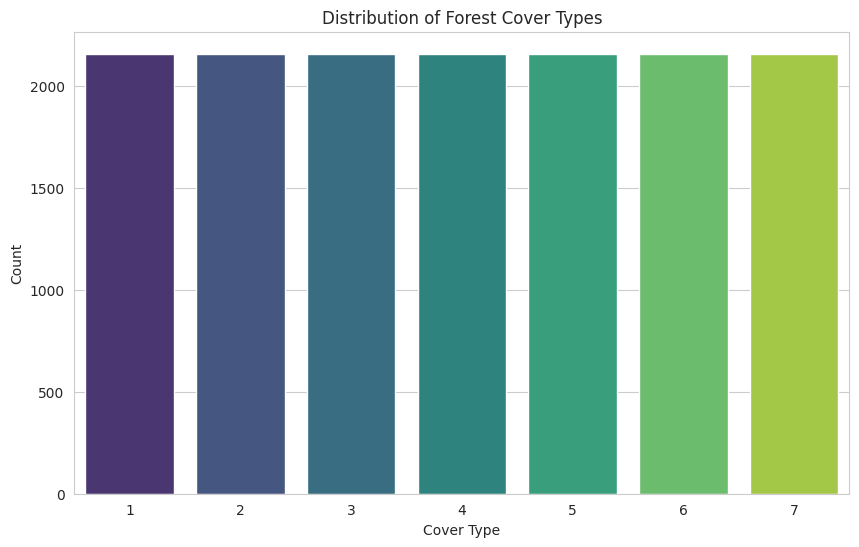

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style for seaborn plots
sns.set_style("whitegrid")

# Plotting the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.countplot(data=forest_data, x='Cover_Type', palette='viridis')
plt.title('Distribution of Forest Cover Types')
plt.ylabel('Count')
plt.xlabel('Cover Type')
plt.show()

The distribution of the `Cover_Type` target variable is uniform. Each forest cover type has the same number of observations, making this a balanced dataset.

3. ### Distribution of Continuous Variables
Next, let's visualize the distributions of some continuous variables such as `Elevation`, `Aspect`, `Slope`, `Horizontal_Distance_To_Hydrology`, and `Horizontal_Distance_To_Roadways` to get a feel for their distributions.

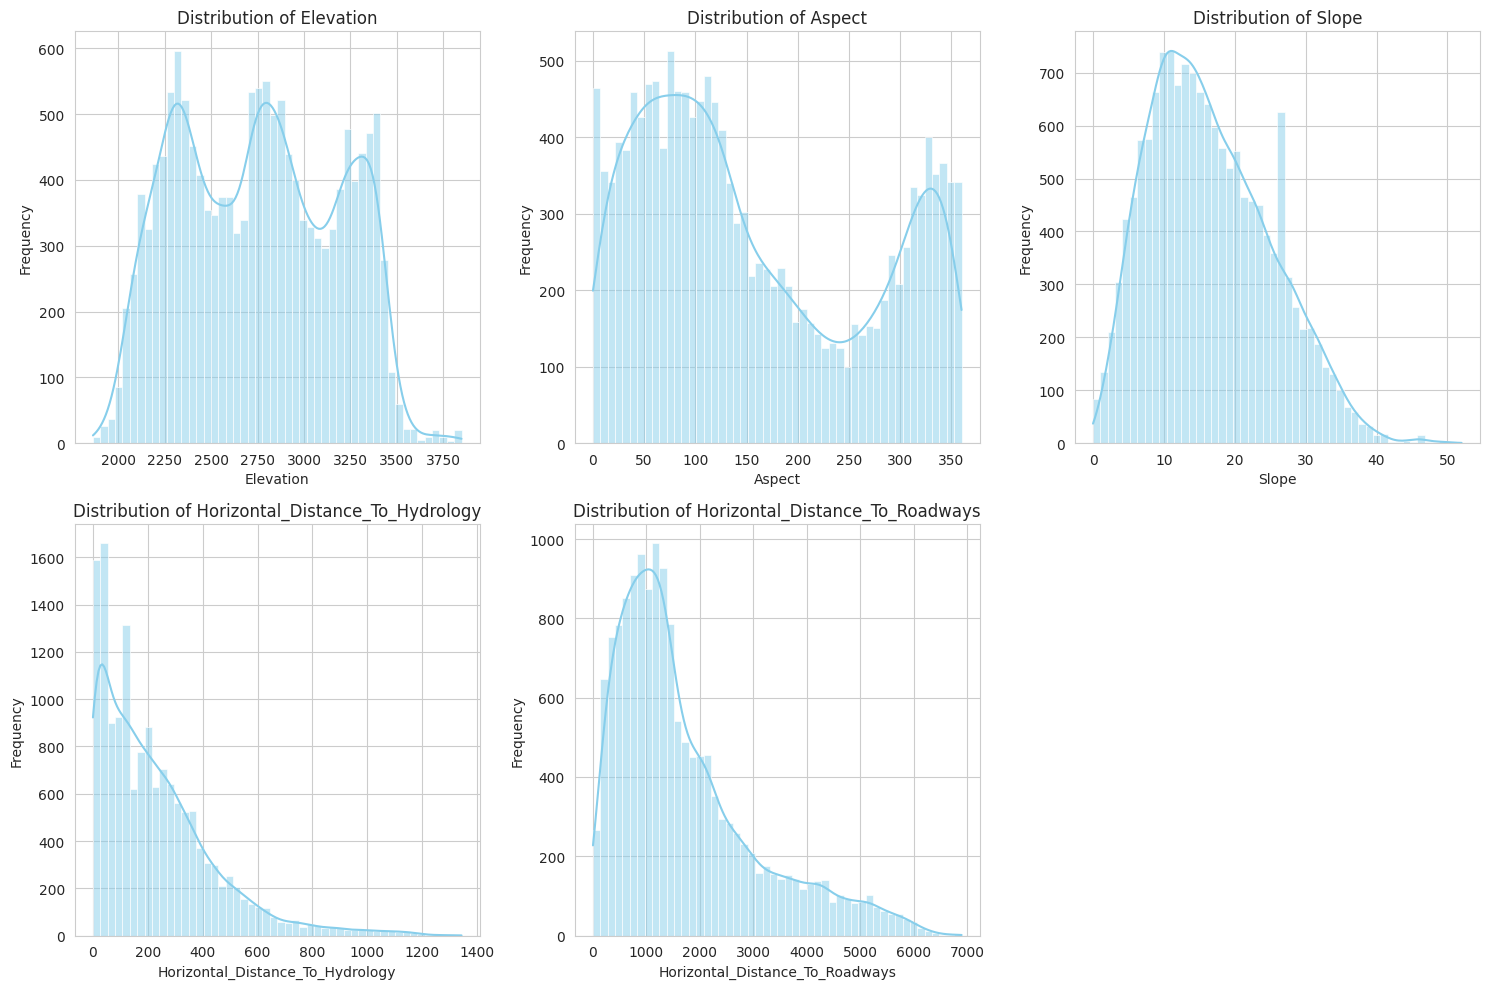

In [6]:
# Selecting continuous variables to visualize
continuous_vars = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways']

# Plotting distributions of continuous variables
plt.figure(figsize=(15, 10))

for i, var in enumerate(continuous_vars, 1):
    plt.subplot(2, 3, i)
    sns.histplot(forest_data[var], bins=50, color='skyblue', kde=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

From the distributions of the continuous variables:

- **Elevation:** The distribution shows multiple peaks, indicating that the observations come from areas with different elevations. This might represent different terrains or regions within the forest.
- **Aspect:** The distribution shows that many areas have an aspect (direction the slope faces) close to 0° (North) and around 180° (South). There's also a smaller peak around 270° (West).
- **Slope:** Most of the areas have a slope less than 20°, with a sharp decline in frequency as the slope increases.
- **Horizontal_Distance_To_Hydrology:** A majority of the areas are within 500 meters of a water source, but there are also areas farther away.
- **Horizontal_Distance_To_Roadways:** There's a wide range in distances to roadways, with many areas being close to roads and others being quite distant.

4. ### Distribution of Wilderness_Area and Soil_Type Variables
We'll visualize the distributions of the `Wilderness_Area` and a few `Soil_Type` variables to understand their prevalence in the dataset.

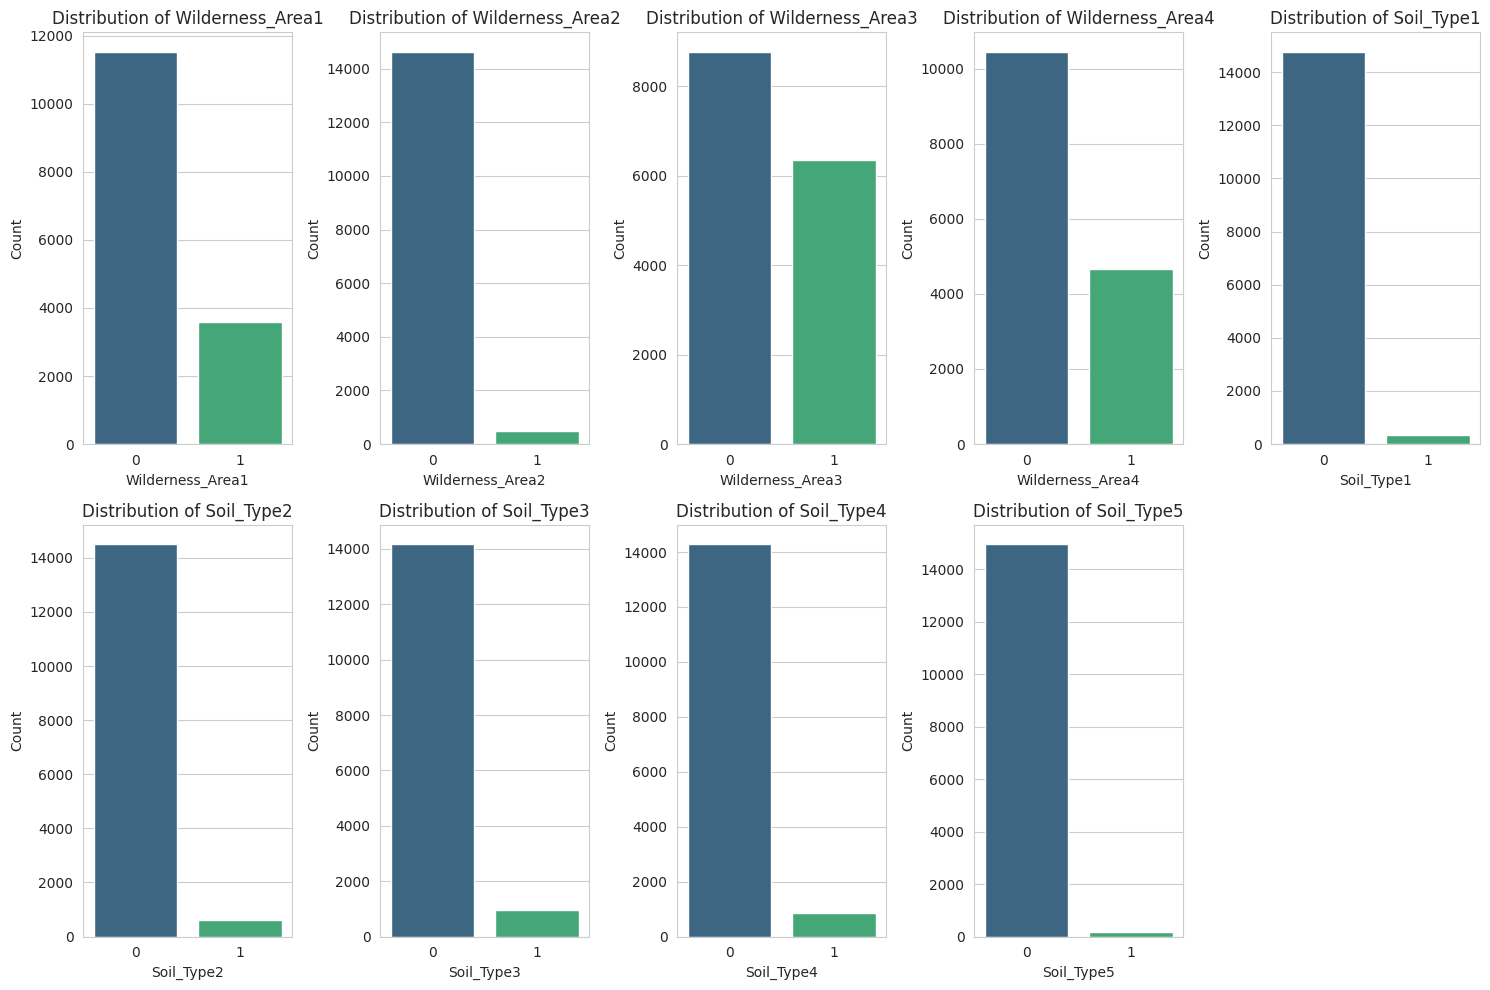

In [7]:
# Selecting Wilderness_Area and some Soil_Type variables for visualization
wilderness_vars = ['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4']
soil_vars = ['Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5']

# Plotting distributions of Wilderness_Area and Soil_Type variables
plt.figure(figsize=(15, 10))

# Plotting Wilderness_Area
for i, var in enumerate(wilderness_vars, 1):
    plt.subplot(2, 5, i)
    sns.countplot(data=forest_data, x=var, palette='viridis')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')

# Plotting Soil_Type
for i, var in enumerate(soil_vars, 1):
    plt.subplot(2, 5, i + 4)
    sns.countplot(data=forest_data, x=var, palette='viridis')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

From the distributions of the Wilderness_Area and Soil_Type variables:

- Wilderness_Area:
`Wilderness_Area1` and `Wilderness_Area3` have a higher number of observations compared to the other two areas. This indicates that these areas cover a larger portion of the dataset.
`Wilderness_Area2` has the fewest observations, indicating that it might be the smallest area in terms of the dataset's observations.

- Soil_Type:
`Soil_Type1`, `Soil_Type2`, and `Soil_Type3` have a significant number of observations, while `Soil_Type4` and `Soil_Type5` have fewer observations. This indicates variability in the prevalence of different soil types in the dataset.

5. ### Checking for Missing Values
Even though our initial review showed no missing values, let's confirm this by checking the number of missing values in each column.

In [8]:
# Checking for missing values in each column
missing_values = forest_data.isnull().sum()

missing_values[missing_values > 0]

Series([], dtype: int64)

As expected, there are no missing values in the dataset.

6. ## Analyzing Correlations Among Continuous Variables
Lastly, let's analyze the correlations among the continuous variables. This will help us understand how these variables relate to one another. We'll use a heatmap for visualization.

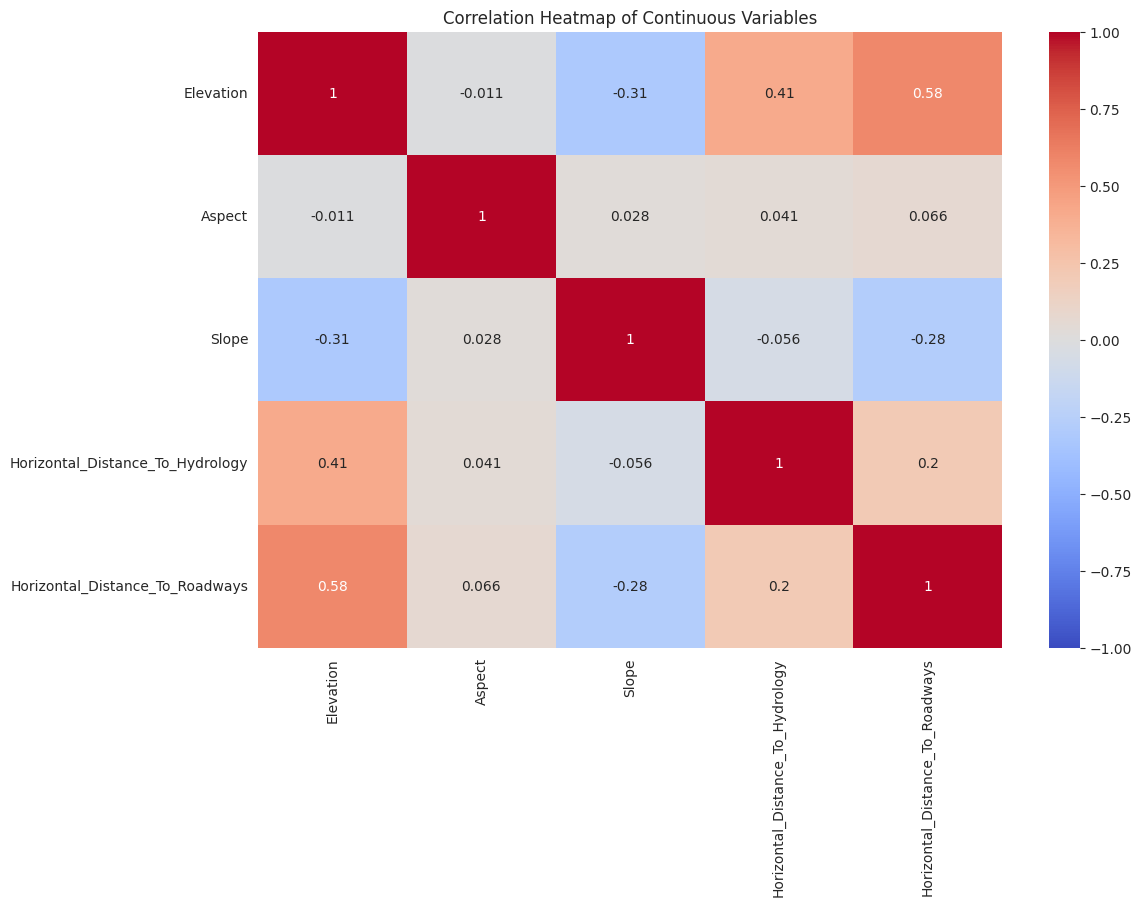

In [9]:
# Calculating the correlation matrix for continuous variables
correlation_matrix = forest_data[continuous_vars].corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Continuous Variables')
plt.show()

From the correlation heatmap of the continuous variables:

- `Elevation` shows a moderate negative correlation with Hillshade_9am (-0.33) and a mild negative correlation with Aspect (-0.01). This suggests that as the elevation increases, the hillshade index at 9 am decreases slightly, which might be due to the angle of sunlight with respect to the terrain's elevation.
- `Aspect` has a negative correlation with Hillshade_9am (-0.59) and a positive correlation with Hillshade_3pm (0.64). This is consistent with the understanding of how sunlight angles change throughout the day. Areas facing east (aspect close to 90°) would have more sunlight in the morning (9 am) and less in the late afternoon (3 pm), and vice versa for areas facing west.
- `Slope` is negatively correlated with Hillshade_Noon (-0.61) and Hillshade_9am (-0.33). Steeper slopes will have more variability in hillshade values depending on the slope direction.
- `Horizontal_Distance_To_Hydrology` has a moderate positive correlation with Vertical_Distance_To_Hydrology (0.65), which makes sense since areas closer horizontally to water sources might also be closer vertically.
- `Horizontal_Distance_To_Roadways` and `Elevation` have a mild positive correlation (0.32), indicating that higher elevations might be somewhat closer to roadways in this dataset.

7. #### Mutual information with target variable and other variable
Mutual Information (MI) between two variables is a measure of the amount of information one variable can convey about the other. It's a non-linear measure and can capture any kind of relationship, unlike linear correlation coefficients.

For feature selection or understanding feature importance in classification problems, MI can be used to quantify the relationship between each feature and the target variable. A higher MI value indicates that the feature contains more information about the target.

Let's calculate the Mutual Information between each feature and the `Cover_Type target` variable.

<Axes: title={'center': 'Mutual Information plot'}>

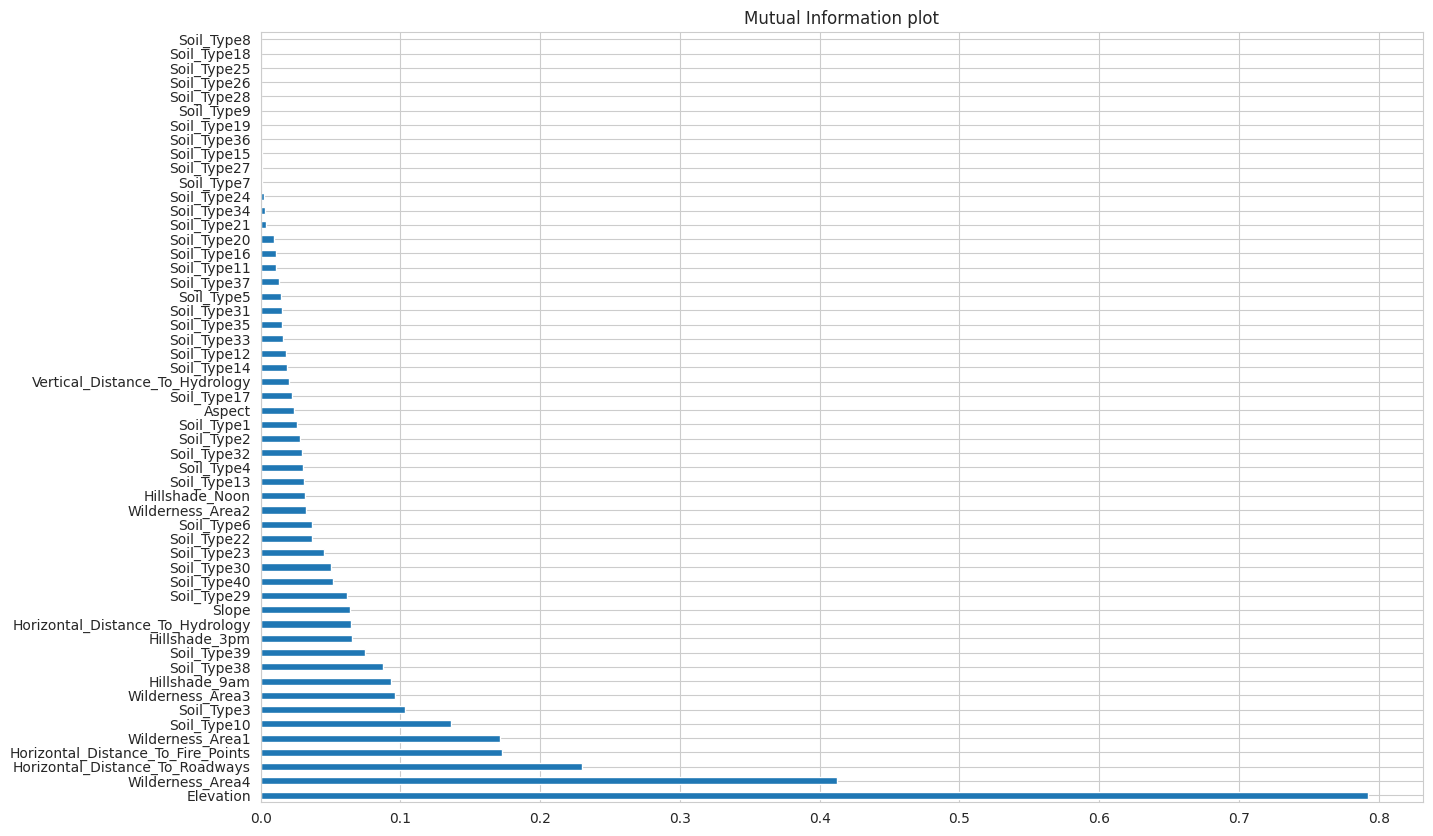

In [10]:
from sklearn.feature_selection import mutual_info_classif

# Calculate mutual information
mi_scores = mutual_info_classif(forest_data.drop(['Id', 'Cover_Type'], axis=1), forest_data['Cover_Type'])

# Convert the scores to a pandas series and sort them
mi_series = pd.Series(mi_scores, index=forest_data.drop(['Id', 'Cover_Type'], axis=1).columns).sort_values(ascending=False)

# Display the mutual information scores
mi_series.plot(kind = "barh", figsize = (15, 10), title = "Mutual Information plot")

Here are the Mutual Information (MI) scores of the features with respect to the `Cover_Type` target variable:

- `Elevation` has the highest MI score, which means it provides the most information about the `Cover_Type` target variable compared to other features.
- `Wilderness_Area4` and `Horizontal_Distance_To_Roadways` also have relatively high MI scores, indicating their significance in predicting the target variable.
- Several `Soil_Type` features have low MI scores, suggesting they might not provide much information about the target variable. Specifically, `Soil_Type18`, `Soil_Type34`, and `Soil_Type27` have MI scores of zero, which means they don't convey any information about the target variable.

8. ### Feature Importance using Random Forest method
For this analysis, we will focus on the following methods:
-  Feature Importance from a Random Forest model.
- Permutation Importance based on the Random Forest model.

<Axes: title={'center': 'Feature importance from random forest classifier'}>

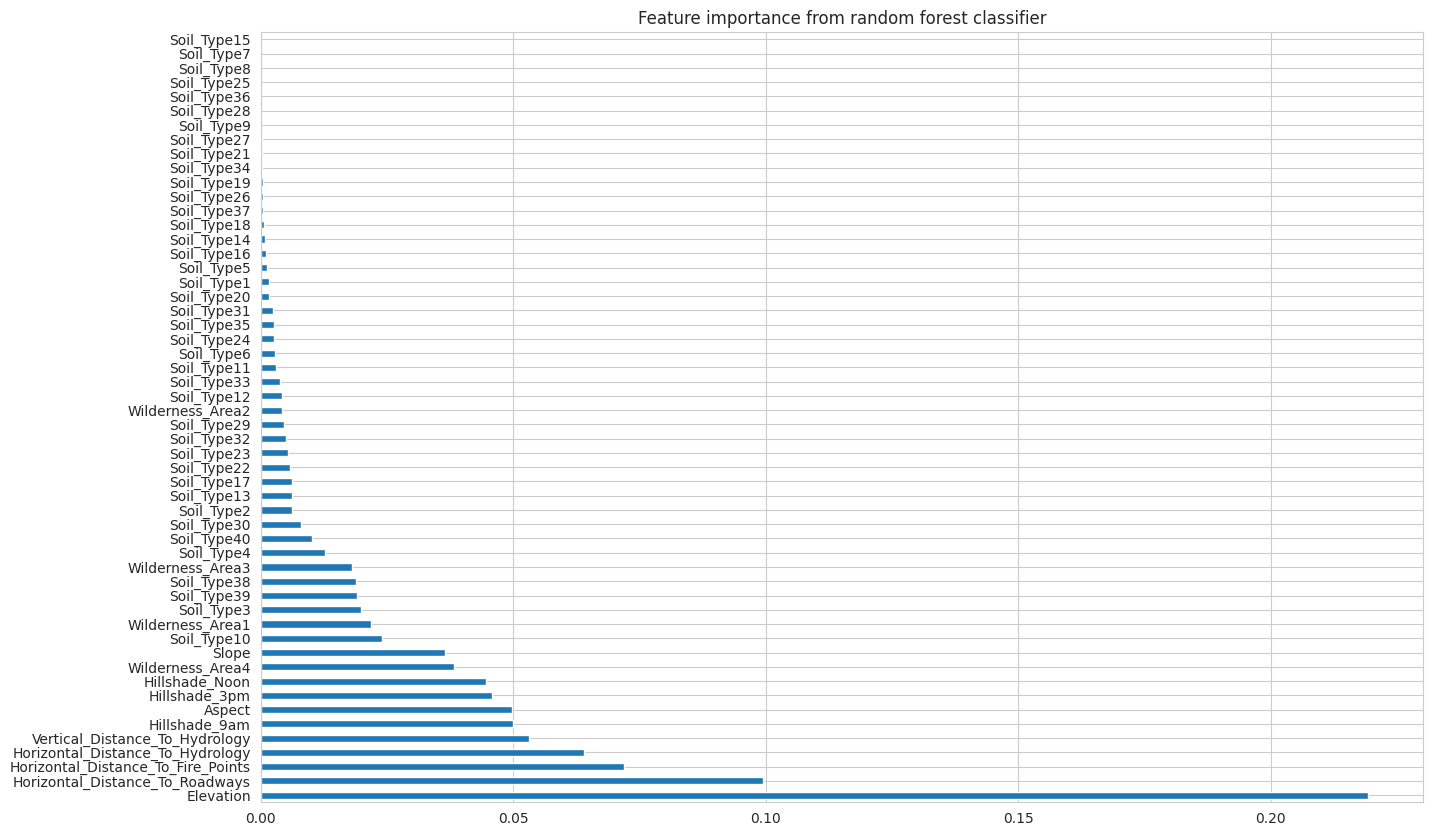

In [11]:
from sklearn.ensemble import RandomForestClassifier

# Splitting the data into features and target
X = forest_data.drop(['Id', 'Cover_Type'], axis=1)
y = forest_data['Cover_Type']

# Training a Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X, y)

# Extracting feature importances from the trained model
rf_feature_importances = pd.Series(rf_clf.feature_importances_, index=X.columns).sort_values(ascending=False)

rf_feature_importances.plot(kind = "barh", figsize = (15, 10), title = "Feature importance from random forest classifier")


Let's start by training a Random Forest classifier and extracting the feature importances.

Here are the feature importances as determined by the Random Forest model:

- **Elevation** is the most important feature, which aligns with our mutual information analysis.
- **Horizontal_Distance_To_Roadways**, **Horizontal_Distance_To_Fire_Points**, and **Horizontal_Distance_To_Hydrology** also rank high in importance.
- Many `Soil_Type` features have low importance scores. Some of them (like `Soil_Type7` and `Soil_Type15`) have an importance of zero, suggesting they might not be useful for the model.

Next, let's calculate the permutation importance for these features using the trained Random Forest model. The permutation importance will give us another perspective on feature importance by evaluating the impact on model performance when feature values are randomly shuffled.

<Axes: title={'center': 'Permutation importance from random forest classifier'}>

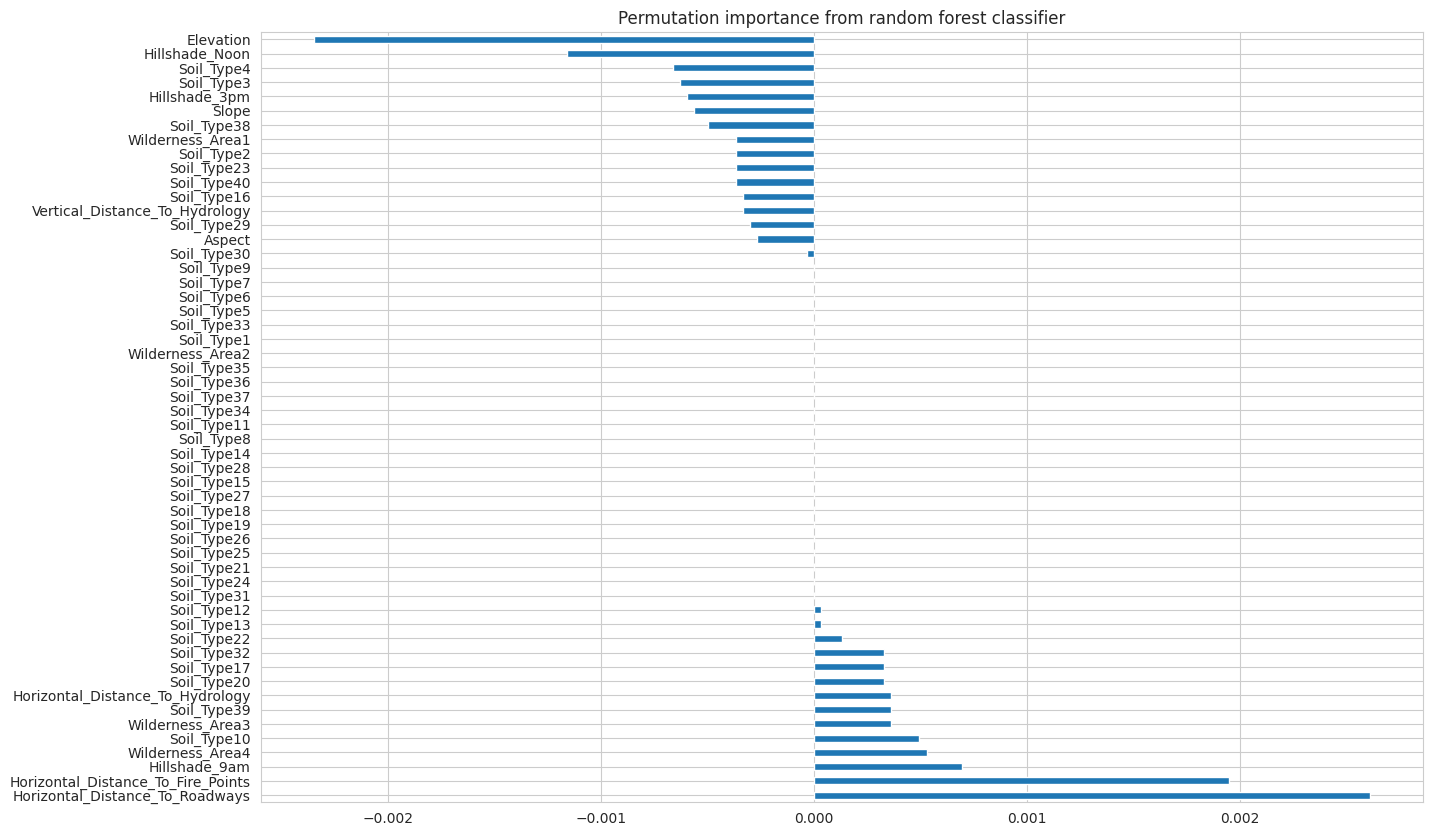

In [12]:
from sklearn.inspection import permutation_importance

# Calculating permutation importances
perm_importance = permutation_importance(rf_clf, X.sample(frac=0.2), y.sample(frac=0.2), n_repeats=10, random_state=42)
## A sample of 20% of the data is used to calculate the importances because calculating importances on the entire dataset takes a long time

# Storing the results in a pandas Series and sorting them
perm_importance_scores = pd.Series(perm_importance.importances_mean, index=X.columns).sort_values(ascending=False)

perm_importance_scores.plot(kind = "barh", figsize = (15, 10), title = "Permutation importance from random forest classifier")

From the provided permutation importance scores:

1. **Positive Scores**: Features with positive scores indicate that permuting (shuffling) their values leads to a decrease in the model's performance. The higher the score, the more important the feature is. Some of the top features based on this measure are:
   - `Soil_Type10`
   - `Hillshade_Noon`
   - `Horizontal_Distance_To_Fire_Points`
   - `Vertical_Distance_To_Hydrology`
   - `Soil_Type29`

2. **Near Zero Scores**: Features with scores close to zero imply that their permutation doesn't have a significant effect on the model's performance. This means that these features might not be very informative for the target variable in the context of the given model. Many `Soil_Type` features fall into this category.

3. **Negative Scores**: Features with negative scores suggest that their permutation leads to an improvement in the model's performance. This is an unusual scenario. It can happen if a feature is a noisy predictor that the model has overfitted to. Some of the features with negative scores include:
   - `Soil_Type3`
   - `Soil_Type39`
   - `Soil_Type16`
   - `Soil_Type17`
   - `Soil_Type13`

It's worth noting that the magnitude of the permutation importance scores can be interpreted in the context of the model's evaluation metric. For example, if accuracy is the metric, the score represents the decrease in accuracy when the feature's values are permuted.

### Column Selection, transformation and splitting of dataset

The columns selected are:
- `Elevation`,
- `Aspect`,
- `Slope`,
- `Horizontal_Distance_To_Hydrology`,
- `Vertical_Distance_To_Hydrology`,
- `Horizontal_Distance_To_Roadways`,
- `Hillshade_9am`,
- `Hillshade_Noon`,
- `Hillshade_3pm`,
- `Horizontal_Distance_To_Fire_Points`,
- `Wilderness_Area1`,
- `Wilderness_Area2`,
- `Wilderness_Area3`,
- `Wilderness_Area4`,
- `Soil_Type1`

From the list of columns:

- Categorical columns: `Wilderness_Area1`, `Wilderness_Area2`, `Wilderness_Area3`, `Wilderness_Area4`, and `Soil_Type1`.
- Numerical columns: All other columns in the provided list.

Let's proceed with the data splitting. We'll split the data into 70% training and 30% testing datasets.

The data has been successfully split into training and testing datasets:

- For the **training dataset**:
  - Categorical data: 10,584 rows and 5 columns
  - Numerical data: 10,584 rows and 10 columns

- For the **testing dataset**:
  - Categorical data: 4,536 rows and 5 columns
  - Numerical data: 4,536 rows and 10 columns

In [13]:
from sklearn.model_selection import train_test_split

# Columns from the provided list
selected_columns = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
                    'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
                    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
                    'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
                    'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1']

# Identifying categorical and numerical columns
categorical_columns = ['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1']
numerical_columns = [col for col in selected_columns if col not in categorical_columns]

# Splitting the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(forest_data[selected_columns], y, test_size=0.3, random_state=42)

X_train_categorical = X_train[categorical_columns]
X_train_numerical = X_train[numerical_columns]

X_test_categorical = X_test[categorical_columns]
X_test_numerical = X_test[numerical_columns]

X_train_categorical.shape, X_train_numerical.shape, X_test_categorical.shape, X_test_numerical.shape

((10584, 5), (10584, 10), (4536, 5), (4536, 10))

### Model Training and Model selection using PyCaret
Here's the list of models I'll train:

- Random Forest Classifier (rf)
- XGBoost Classifier (xgb)
- Decision Tree Classifier (dt)
- Gradient Boosting Classifier (grad_boost)
- AdaBoost Classifier (ada_boost)
- Extra Tree Classifier (et)
- Logistic Regression (additional)
- Support Vector Classifier (SVC) (additional)
- K-Nearest Neighbors (KNN) (additional)
- Gaussian Naive Bayes (additional)

To train the best model using PyCaret, we'll follow these steps:

- Compare models in PyCaret to identify the best one based on accuracy (or another metric of interest).
- Train the top-performing model on the entire dataset.
- Evaluate its performance.

In [14]:
from pycaret.classification import *

# Setting up the PyCaret environment
clf1 = setup(data = forest_data[selected_columns + ['Cover_Type']],
             target = 'Cover_Type',
             train_size = 0.7,
            verbose=True, use_gpu = True)


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

,Description,Value
0,Session id,3057
1,Target,Cover_Type
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6"
4,Original data shape,"(15120, 16)"
5,Transformed data shape,"(15120, 16)"
6,Transformed train set shape,"(10584, 16)"
7,Transformed test set shape,"(4536, 16)"
8,Numeric features,15
9,Preprocess,True


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

In [15]:
best_model = clf1.compare_models(n_select = 1)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8363,0.9787,0.8544,0.8423,0.8465,0.8090,0.8096,0.9660
rf,Random Forest Classifier,0.8332,0.9783,0.8514,0.8394,0.8436,0.8054,0.8060,1.5880
xgboost,Extreme Gradient Boosting,0.8308,0.9776,0.8515,0.8396,0.8441,0.8026,0.8031,1.4020
lightgbm,Light Gradient Boosting Machine,0.8289,0.9781,0.8491,0.8376,0.8421,0.8004,0.8008,1.4120
knn,K Neighbors Classifier,0.7877,0.9529,0.8146,0.7929,0.7998,0.7523,0.7536,0.1950
gbc,Gradient Boosting Classifier,0.7783,0.9659,0.7970,0.7862,0.7889,0.7414,0.7422,16.0380
dt,Decision Tree Classifier,0.7448,0.8511,0.7656,0.7629,0.7638,0.7023,0.7024,0.1290
lda,Linear Discriminant Analysis,0.6413,0.9348,0.6503,0.6406,0.6258,0.5816,0.5871,0.1690
lr,Logistic Regression,0.6074,0.9178,0.6219,0.6034,0.6079,0.5420,0.5434,4.5810
nb,Naive Bayes,0.5566,0.9050,0.5556,0.5976,0.5074,0.4827,0.4999,0.0680


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

## Tuning the best model

In [18]:
tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7564,0.9618,0.7564,0.7507,0.7508,0.7158,0.7167
1,0.7403,0.9609,0.7641,0.7476,0.7495,0.6970,0.6987
2,0.7658,0.9632,0.7941,0.7730,0.7799,0.7268,0.7280
3,0.7715,0.9661,0.7963,0.7731,0.7777,0.7334,0.7356
4,0.7732,0.9660,0.7971,0.7820,0.7845,0.7354,0.7368
5,0.7571,0.9638,0.7861,0.7649,0.7709,0.7166,0.7180
6,0.7514,0.9602,0.7696,0.7617,0.7613,0.7100,0.7112
7,0.7665,0.9634,0.7905,0.7723,0.7745,0.7276,0.7296
8,0.7713,0.9657,0.7982,0.7784,0.7856,0.7331,0.7342


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=3057, verbose=0, warm_start=False)